# EDA

### Importing data

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing file
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [3]:
data = pd.read_csv(list(uploaded.keys())[0]) #Reading data from the imported

In [4]:
df = data.copy() #making a copy of original data

### Analyzing the data

In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


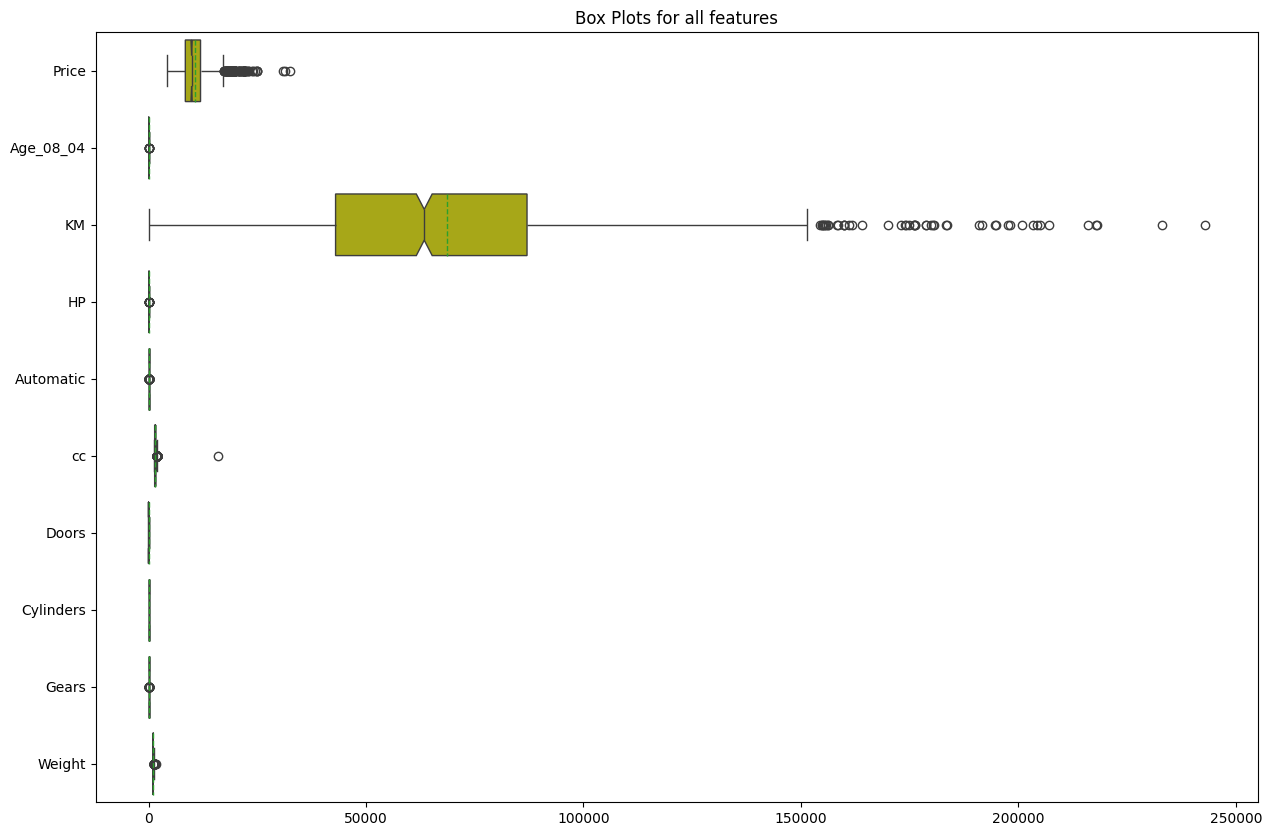

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, showmeans= True, meanline = True, notch = True, color = 'y', orient='h')
plt.title('Box Plots for all features')
plt.show()

In [8]:
df.columns[df.isnull().sum()>0] #Checking for null data if any

Index([], dtype='object')

In [9]:
#df.duplicated().sum()
df[df.duplicated(keep = False)] #Checking for duplicated rows if any

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [10]:
df.drop_duplicates(inplace = True).reset_index() #Dropping the duplicated rows from the data

In [11]:
df.nunique() #Gives all the unique values in features

,0
Price,236
Age_08_04,77
KM,1263
Fuel_Type,3
HP,12
Automatic,2
cc,13
Doors,4
Cylinders,1
Gears,4


In [12]:
cat_col = list(df.columns[df.nunique()<=15]) #Making a list of features which can be categorical
cat_col

['Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears']

In [13]:
#Checking the value counts of Categorial features
for col in cat_col:
  df[col].value_counts()
  print(df[col].value_counts())
  print("\n")

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64


HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: count, dtype: int64


Automatic
0    1355
1      80
Name: count, dtype: int64


cc
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1332       2
1398       2
16000      1
1975       1
Name: count, dtype: int64


Doors
5    673
3    622
4    138
2      2
Name: count, dtype: int64


Cylinders
4    1435
Name: count, dtype: int64


Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64




### EDA

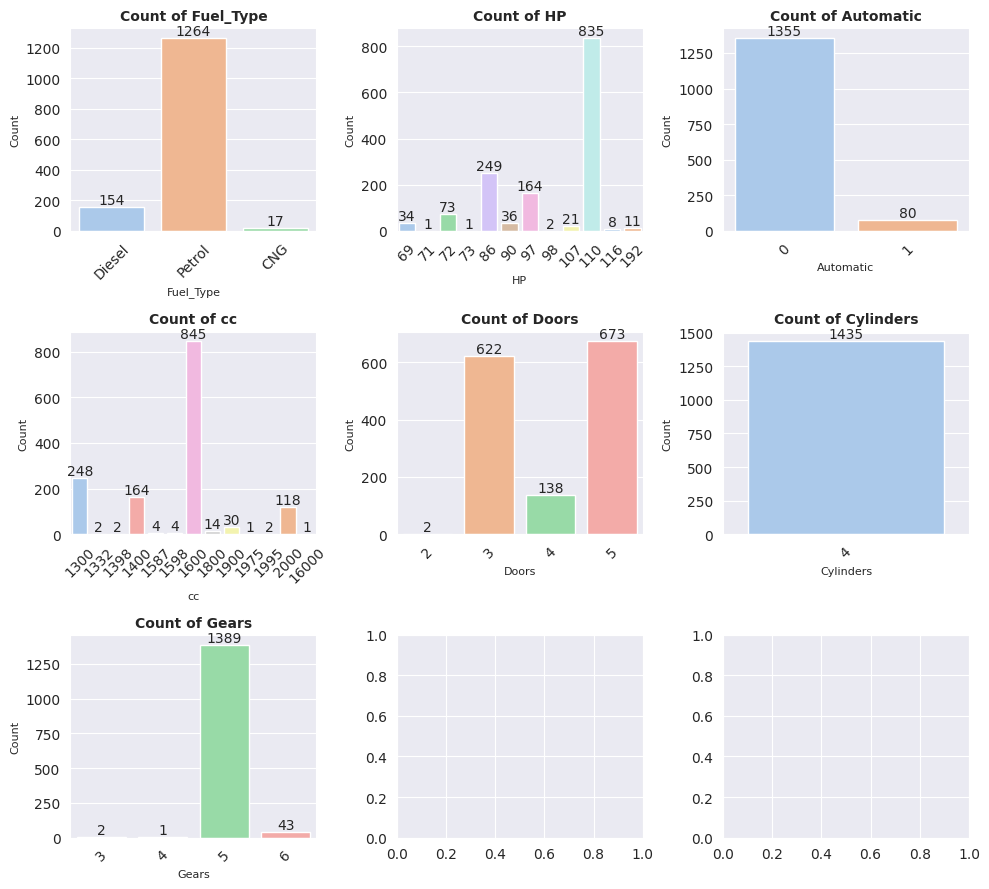

In [14]:
#Bar plots of the Categorical data
#Bar plots to analyse the features having less classes
sns.set_style('darkgrid')

n_cols = 3
n_rows = int(np.ceil(len(cat_col)/n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize = (10,3*n_rows))
ax = ax.flatten()

for i, col in enumerate(cat_col):
  baar = sns.countplot(data = df, x = col, ax = ax[i], palette = 'pastel')

  for container in baar.containers:
        baar.bar_label(container)

  ax[i].set_xlabel(col, fontsize = 8)
  ax[i].set_ylabel('Count',  fontsize = 8)
  ax[i].set_title(f'Count of {col}', fontsize = 10, fontweight = 'bold')
  ax[i].tick_params(axis = 'x', rotation = 45)

fig.tight_layout()
plt.show()


From the count plots it was observed that
Petrol cars were high in count compared to diesel and CNG.
110 hp cars are in high count and all others were having almost equal counts with few diveations.
Automati cars were very high having around 92% of data.
1600 cc cars were high in count followed by 1300,1400,2000.
Cylinders were having only 1 class it wont be contributing in predicting the target variable. This has to be removed.


In [15]:
#Making a list of all non categorical data
noncat_col = list(df.columns[df.nunique()>15])
noncat_col

['Price', 'Age_08_04', 'KM', 'Weight']

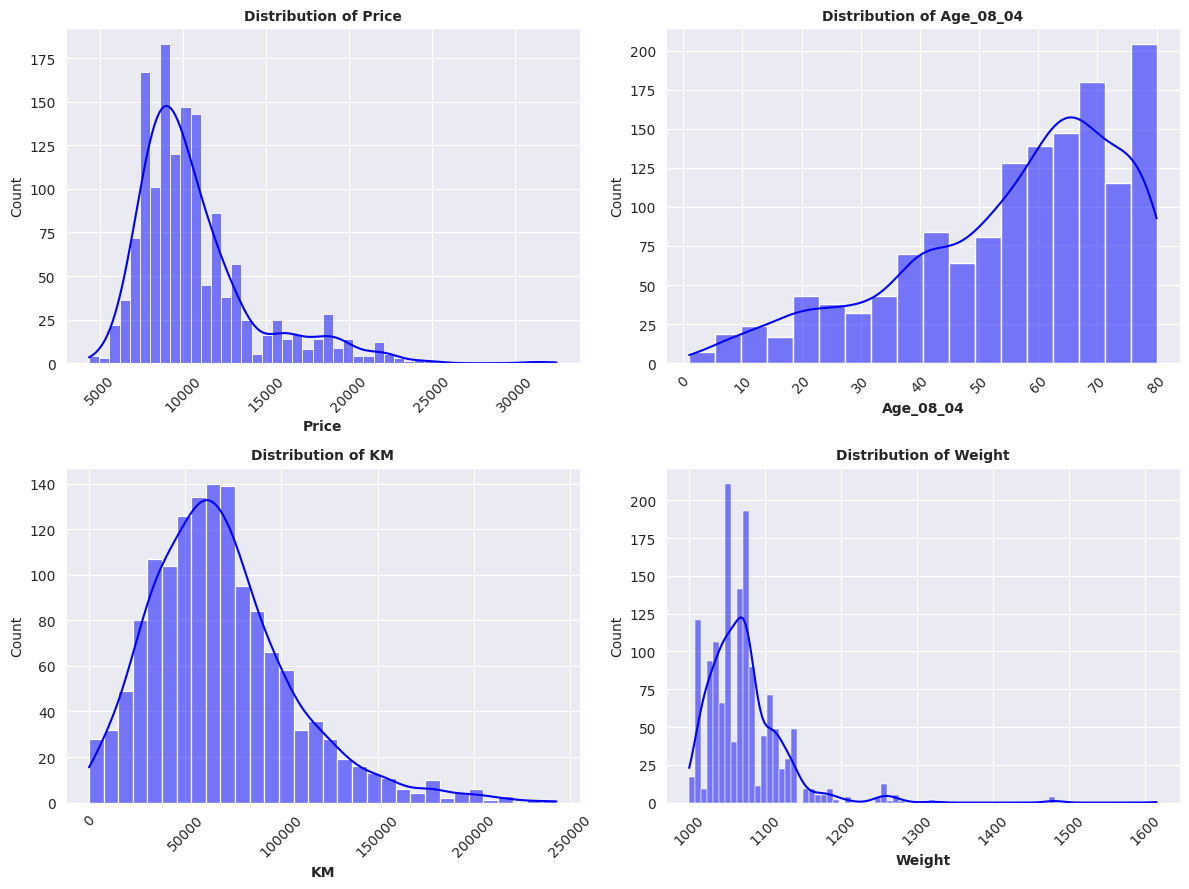

In [16]:
#Histogram distribution of the non categorical data
sns.set_style('darkgrid')

n_cols = 2
n_rows = int(np.ceil(len(noncat_col)/n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize = (12, 9))
ax = ax.flatten()

for i, col in enumerate(noncat_col):
  sns.histplot(data = df, x= col, ax = ax[i], kde = True, color ='b')
  ax[i].set_title(f'Distribution of {col}', fontsize = 10, fontweight ='bold')
  ax[i].set_xlabel(col, fontsize = 10, fontweight ='bold')
  ax[i].tick_params(axis = 'x', rotation = 45)
plt.tight_layout()
plt.show()



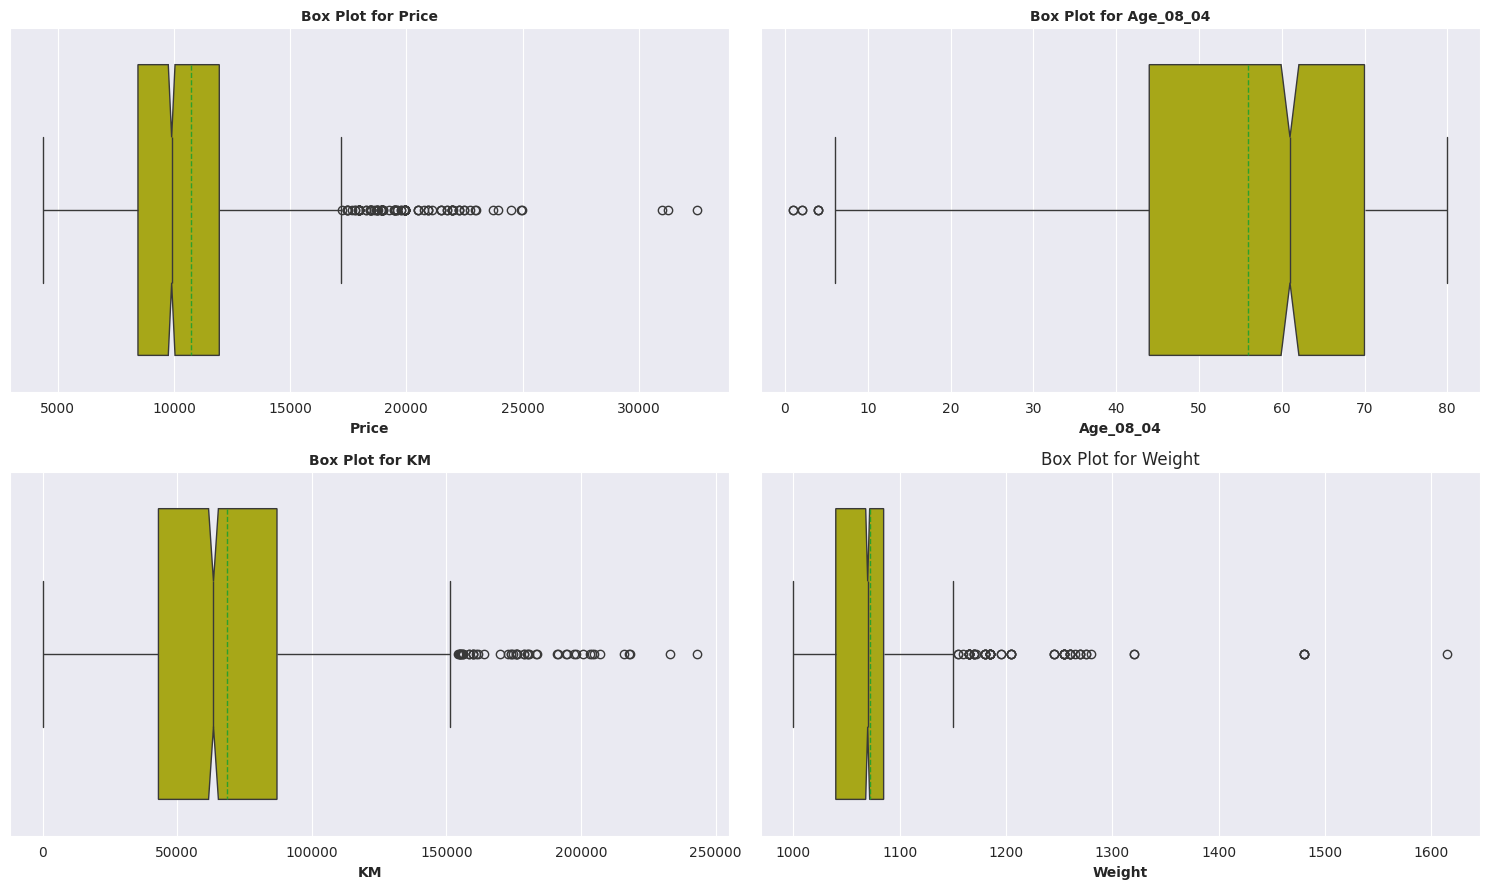

In [17]:
#Box plots of all non categorical data
sns.set_style('darkgrid')

n_cols = 2
n_rows = int(np.ceil(len(noncat_col)/n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, 9))
ax = ax.flatten()

for i, col in enumerate(noncat_col):
  sns.boxplot(data = df, x = col, color = 'y', ax= ax[i], orient ='h', notch = True,
              showmeans = True, meanline = True)
  ax[i].set_title(f'Box Plot for {col}', fontsize = 10, fontweight ='bold')
  ax[i].set_xlabel(col, fontsize = 10, fontweight ='bold')
plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

Price:
The distribution is right-skewed, with a long tail toward higher prices.

Most cars are priced in the lower-to-mid range.

Age_08_04:
The distribution is left-skewed, meaning most cars are relatively old.

Newer cars are fewer in number.

KM:
The distribution is right-skewed, with many cars having mileage below 100 thousand.

A few high-mileage cars stretch the tail.

Weight:
The distribution is right skewed with very long tail but 75% of the data lies around the weight 1100.

This suggest that the outliers in the data might be wrongly given or few heavy weighted cars are in the data.

In [18]:
##Applying one hot encoding on fuel type feature
# drop_first = True as there were very few points in CNG Class this would reduce the number of features too for a class
df = pd.get_dummies(df, columns =['Fuel_Type'] , drop_first = True).astype(int)

Dummies creates two addictional features with petrol and diesel.
It is observed that the AUtomatic features having binary data which might have a multicollinearity issue with the features petrol and diesel

In [19]:
#Dropping the Cylinders feature as it has single class and wont be contributing in predicting
df.drop(columns = ['Cylinders'], inplace = True)

In [20]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0


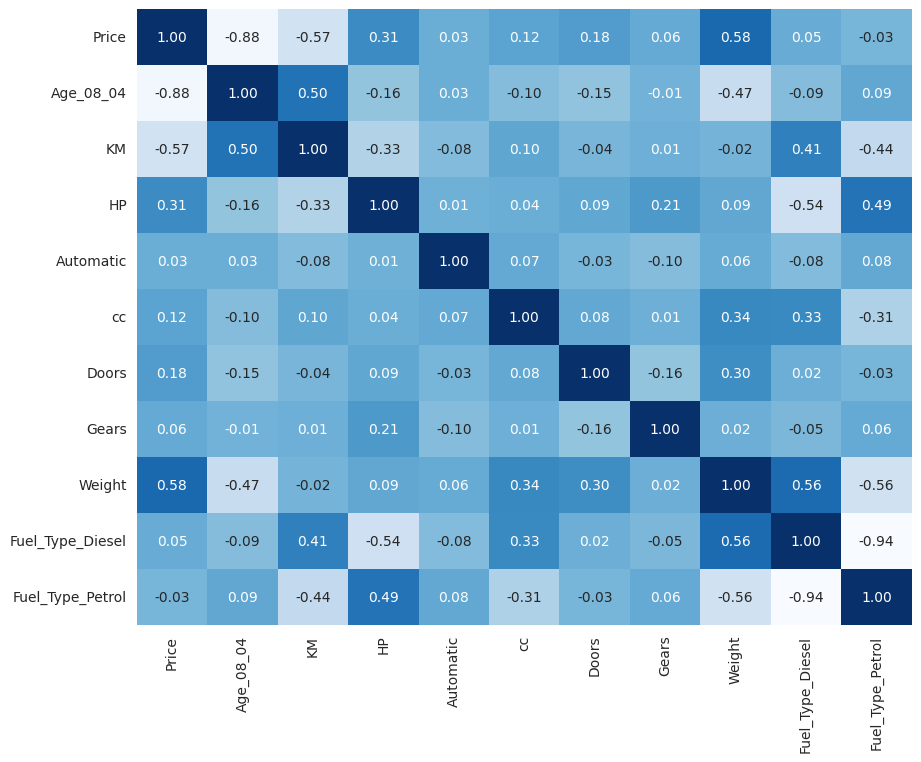

In [21]:
#Correlation matrix with heatmap
plt.figure(figsize = (10,8))
#mask = df.corr().abs()>=0.5
#sns.heatmap(df[noncat_col].corr(), annot = True, cmap = 'Blues', cbar = False, fmt = ".2f")
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', cbar = False, fmt = ".2f")
plt.show()

From the heat map it was observed that not all features have a strong correlation with the dependent variable except Age, KM, Weight. There are few features that have moderate to weak relationship with the independent feature. This might be because of the binary data in the features. The further analysis would give a detailed confirmation about the issues.

<Figure size 1000x800 with 0 Axes>

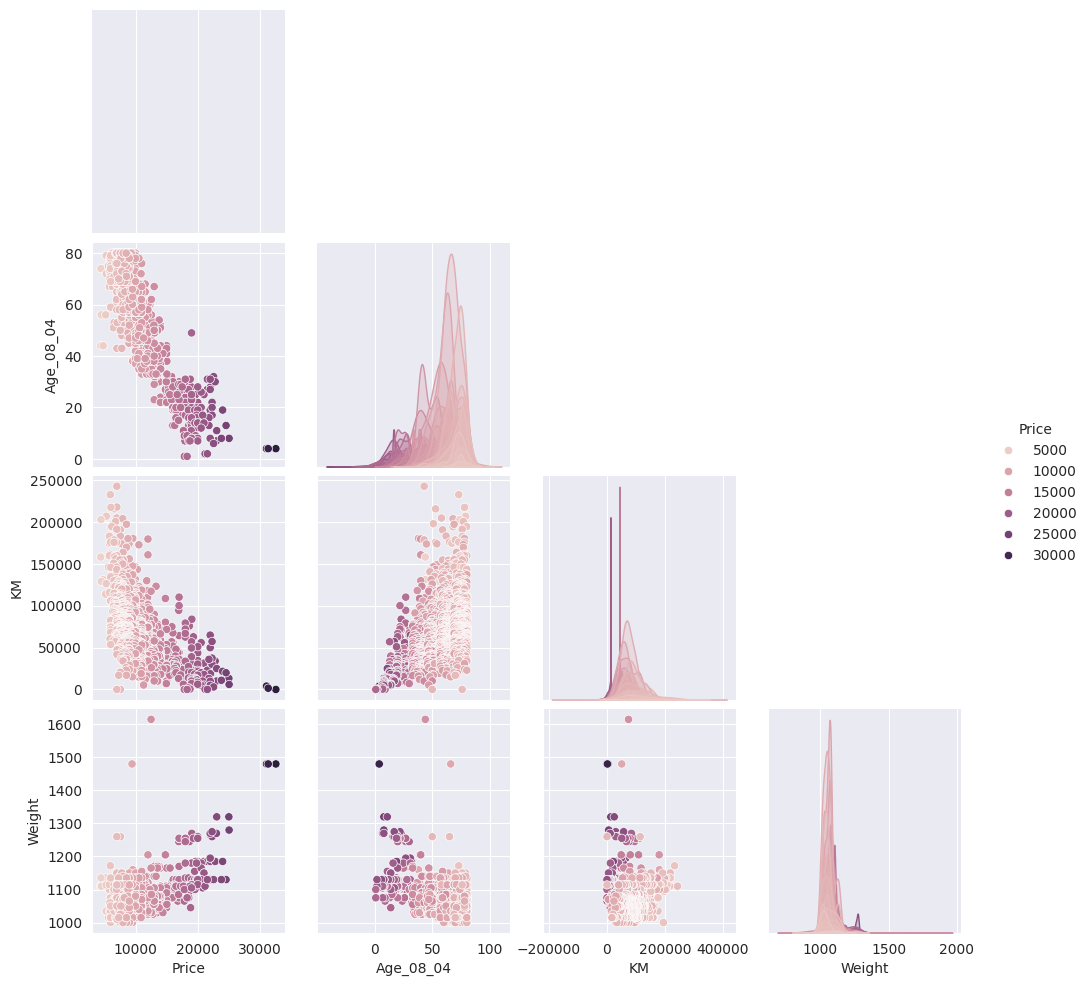

In [22]:
#Pairplots of the non categorical data
plt.figure(figsize = (10,8))
sns.pairplot(df, hue = 'Price', vars = noncat_col, corner = True)
plt.show()

From the scatter plot it can be seen that the independent variable have a very good relation with the dependent variable and not so good relation with the independent variable. This satifies that few independent variable are having a very good correlation with the depended variable and there is aa very less chance of multicollinearity. The further analysis checks the multicollinearity issue in depth.

# Model Building

### Building the first model

In [26]:
import statsmodels.formula.api as smf

In [ ]:
df1 = df.copy() #Making a copy of df (Preprocessed data)

In [ ]:
#Variable to store the column names to use in further analysis
X_var = df1.drop(columns = ['Price']).columns
X_var

In [27]:
#creating a variable that stores the equation for linear regression
f1 = 'Price ~ ' + '+'.join(X_var)

In [28]:
#creating a linear regression model
m1 = smf.ols(formula = f1, data = df1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     902.9
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        04:04:55   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1424   BIC:                         2.480e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9754.1952   1529.309     -6.378      0.000   -1.28e+04   -6754.255
Age_08_04         -123.8404      2.629    -47.102      0.000    -128.998    -118.683
KM                  -0.0174      0.001    -13.072      0.000      -0.020      -0.015
HP                  23.3146      3.574      6.524      0.000      16.304      30.325
Automatic          303.2536    160.902      1.885      0.060     -12.377     618.884
cc                  -0.0520      0.092     -0.565      0.572      -0.232       0.128
Doors              -29.8840     40.875     -0.731      0.465    -110.066      50.298
Gears              627.0820    197.877      3.169      0.002     238.921    1015.243
Weight              20.7066      1.219     16.992      0.000      18.316      23.097
Fuel_Type_Diesel   536.9989    382.521      1.404      0.161    -213.366    1287.364
Fuel_Type_Petrol  1144.7185    338.371      3.383      0.001     480.959    1808.478
==============================================================================
Omnibus:                      259.860   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2720.769
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                       9.668   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Rsquare and adjusted r square values were very good. The p values for mos the features were below the significance value 0.5. The features with high variance need a deep analysis to check if they have any influencing data points or having multicollinearity issue. There are few pre requisites for the linear model that has to be satified like normal distribution of error, mean = 0 , error variance and auto corelation.

In [29]:
f2 = 'Price ~ Automatic'
f3 = 'Price ~ cc'
f4 = 'Price ~ Doors'
f5 = 'Price ~ Fuel_Type_Diesel'
f6 = 'Price ~ Automatic + cc'
f7 = 'Price ~ Automatic + Doors'
f8 = 'Price ~ Automatic + Fuel_Type_Diesel'
f9 = 'Price ~ cc + Doors'
f10 = 'Price ~ cc + Fuel_Type_Diesel'
f11 = 'Price ~ Doors + Fuel_Type_Diesel'
f12 = 'Price ~ Automatic + cc + Fuel_Type_Diesel'
f13 = 'Price ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Gears + Weight'

In [30]:
formulas = [f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]

for i, f in enumerate(formulas, start =2):
  model = smf.ols(formula = f, data = df1).fit()

  print(f'model f{i}:')
  print(f'R-Sqaures : {model.rsquared:.3f}')
  print(f'p-values: {round(model.pvalues,3)}')
  print("-" * 20)

model f2:
R-Sqaures : 0.001
p-values: Intercept    0.000
Automatic    0.199
dtype: float64
--------------------
model f3:
R-Sqaures : 0.015
p-values: Intercept    0.0
cc           0.0
dtype: float64
--------------------
model f4:
R-Sqaures : 0.034
p-values: Intercept    0.0
Doors        0.0
dtype: float64
--------------------
model f5:
R-Sqaures : 0.002
p-values: Intercept           0.000
Fuel_Type_Diesel    0.078
dtype: float64
--------------------
model f6:
R-Sqaures : 0.016
p-values: Intercept    0.000
Automatic    0.328
cc           0.000
dtype: float64
--------------------
model f7:
R-Sqaures : 0.035
p-values: Intercept    0.000
Automatic    0.133
Doors        0.000
dtype: float64
--------------------
model f8:
R-Sqaures : 0.004
p-values: Intercept           0.00
Automatic           0.15
Fuel_Type_Diesel    0.06
dtype: float64
--------------------
model f9:
R-Sqaures : 0.046
p-values: Intercept    0.0
cc           0.0
Doors        0.0
dtype: float64
--------------------
model f10:

# Calculating the VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
#Calculating the vif with standardized values for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1.drop(columns = ['Price']))

vif_df = pd.DataFrame()
vif_df['Features'] = X_var
vif_df['VIF'] = [variance_inflation_factor(df1_scaled,i)for i in range(df1_scaled.shape[1])]
vif_df

,Features,VIF
0,Age_08_04,1.911952
1,KM,2.002649
2,HP,2.300692
3,Automatic,1.094619
4,cc,1.223606
5,Doors,1.217072
6,Gears,1.117554
7,Weight,3.254342
8,Fuel_Type_Diesel,11.258762
9,Fuel_Type_Petrol,9.652518


# Residual Analysis

### Test for Normality Residuals (Q-Q Plot)

In [37]:
import statsmodels.api as sm


In [38]:
m1.resid.mean()

np.float64(3.2291561851881523e-10)

<Figure size 1000x800 with 0 Axes>

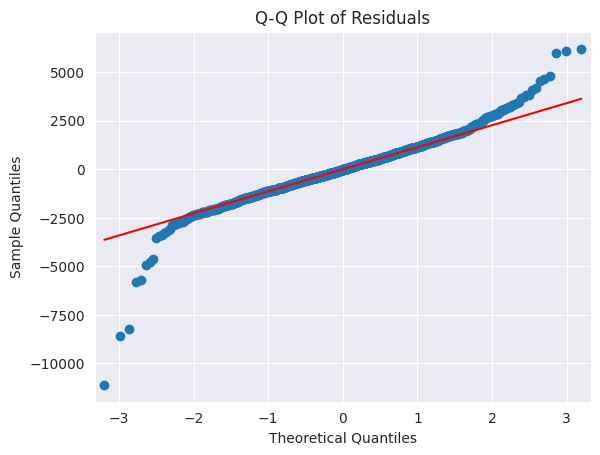

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
qqplot = sm.qqplot(m1.resid,line = 'q')
plt.title('Q-Q Plot of Residuals')
plt.show()

### Distribution of Residuals

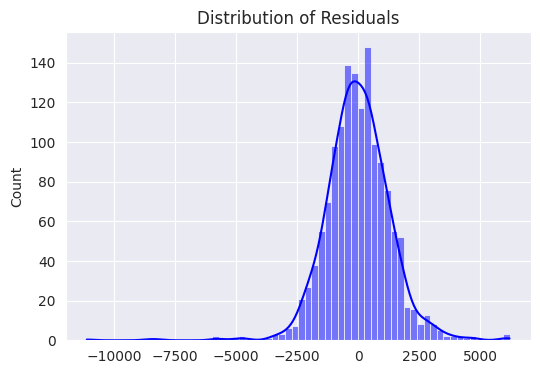

In [40]:
plt.figure(figsize = (6,4))
sns.histplot(m1.resid, kde = True, color ='b')
plt.title('Distribution of Residuals')
plt.show()


### Constant Variance of Errors plt.figure(Homoscadasticity / Hectroscadasticity)


In [41]:
#Creating a function to standardizing  down the values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

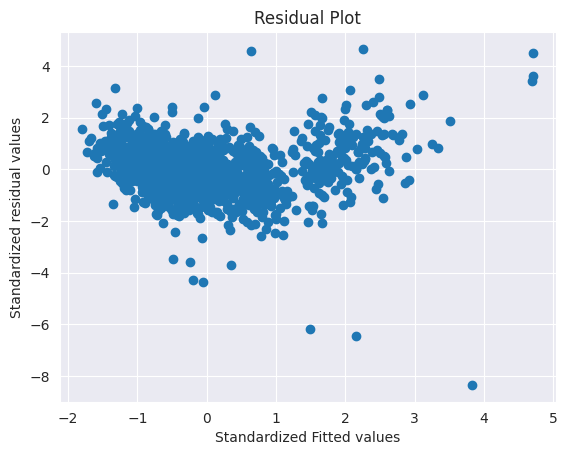

In [42]:
#Standardizing the predicted and actual values
#Scatter plot to check pattern Homo and Hetroscadasticity
plt.scatter(get_standardized_values(m1.fittedvalues),
            get_standardized_values(m1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

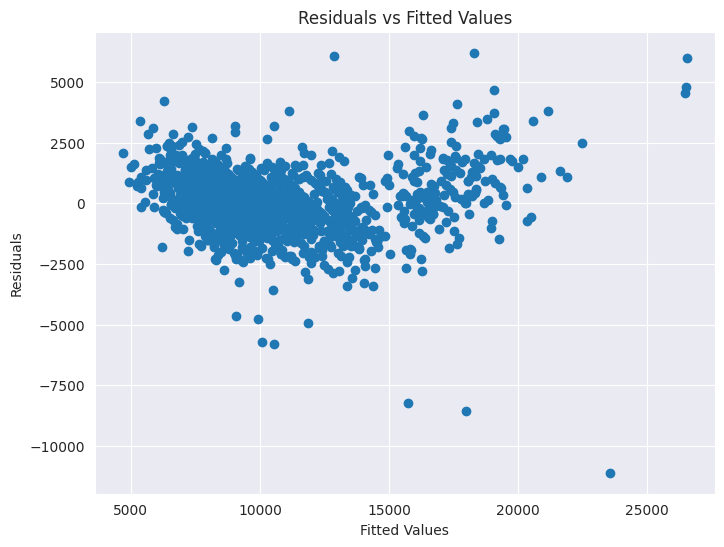

In [43]:
#PLot without standardizing the values
plt.figure(figsize = (8,6))
plt.scatter(m1.fittedvalues, m1.resid)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

NO visible pattern was observed. Most of the data points were on the horizontal axis with very few data points scattered around.

# Detecting the outliers / Influencers

### Cooks Distance

In [44]:
#Using cooks distance to get the influencing data points in the model
model_influence = m1.get_influence()
(c,_) = model_influence.cooks_distance

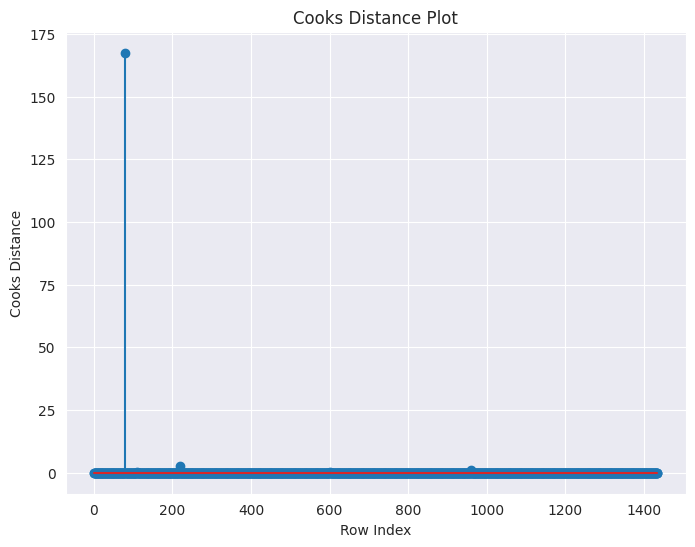

In [46]:
#PLot to view the influencing data points
plt.figure(figsize = (8,6))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.title('Cooks Distance Plot')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### Influencial points plot

In [47]:
from statsmodels.graphics.regressionplots import influence_plot

<Figure size 1000x800 with 0 Axes>

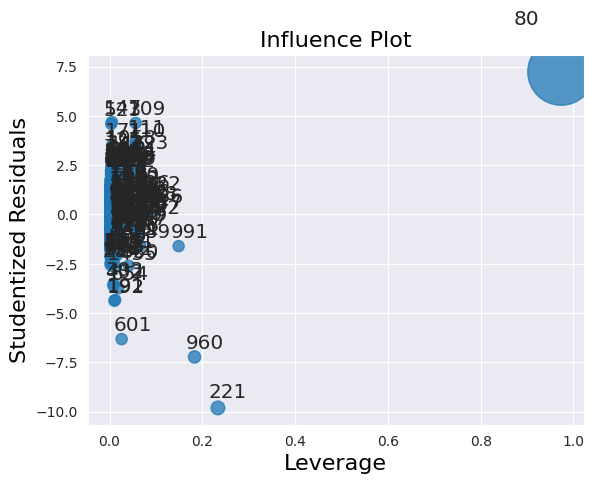

In [48]:
#Another plot without cooks distance to view the inflencing points.
plt.figure(figsize = (10,8))
influence_plot(m1)
plt.show()

In [80]:
influencial_points = np.where(c>0.8)[0]
influencial_points

array([ 80, 220, 959])

In [50]:
(np.argmax(c),np.max(c))

(np.int64(80), np.float64(167.55155590709458))

In [51]:
df1.iloc[influencial_points,:]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,5,1180,0,1
221,12450,44,74172,110,0,1600,5,5,1615,0,1
960,9390,66,50806,86,0,1300,3,5,1480,0,1


There were 3 data points that were affecting the model. Few rows have high scale data like cc with 16000 which is not normal. Removing the row might bring down the metric values.

# Building New model

In [127]:
df2 = df1.copy()

In [128]:
#Droppig the influencial data poits and reseting the index
df2 = df2.drop(influencial_points, axis = 0).reset_index()
df2.drop(['index'], axis =1, inplace = True)

In [129]:
#viewing influencial data points
df2.iloc[influencial_points,:]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
80,17250,29,20000,110,0,1600,5,5,1115,0,1
220,14950,44,71793,110,0,1600,4,5,1067,0,0
959,9950,62,50000,110,0,1600,5,5,1075,0,1


### Model

In [130]:
#Creating variables to store the column names for further anlasis in the model
col1 = df2.drop(['Price'], axis =1).columns
col2 = col1.drop('Automatic')
col3 = col1.drop('Fuel_Type_Diesel')
col4 = col1.drop('Doors')
col5 = col1.drop('Automatic').drop('Fuel_Type_Diesel')

In [131]:
col4

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [132]:
#Creating all the variations of features for the model
final_m1 = 'Price ~' + '+'.join(col1)
final_m2 = 'Price ~' + '+'.join(col2)
final_m3 = 'Price ~' + '+'.join(col3)
final_m4 = 'Price ~' + '+'.join(col4)
final_m5 = 'Price ~' + '+'.join(col5)

In [133]:
formulas = [final_m1,final_m2,final_m3,final_m4, final_m5]

#using for loop to execute models with different features variations and check the results for deep analysis
for i, f in enumerate(formulas, start = 1):
  final_models = smf.ols(formula = f, data = df2).fit()

  print(f'Final Model : m{i}')
  print(f'R-Square: {final_models.rsquared:.3f}')
  print(f'P-Values: {round(final_models.pvalues,2)}')
  print(f'AIC Values: {final_models.aic}')
  print("-"*20)

Final Model : m1
R-Square: 0.868
P-Values: Intercept           0.00
Age_08_04           0.00
KM                  0.00
HP                  0.00
Automatic           0.03
cc                  0.00
Doors               0.75
Gears               0.01
Weight              0.00
Fuel_Type_Diesel    0.00
Fuel_Type_Petrol    0.00
dtype: float64
AIC Values: 24639.483516502496
--------------------
Final Model : m2
R-Square: 0.868
P-Values: Intercept           0.00
Age_08_04           0.00
KM                  0.00
HP                  0.00
cc                  0.00
Doors               0.96
Gears               0.02
Weight              0.00
Fuel_Type_Diesel    0.00
Fuel_Type_Petrol    0.00
dtype: float64
AIC Values: 24642.475974991612
--------------------
Final Model : m3
R-Square: 0.865
P-Values: Intercept           0.00
Age_08_04           0.00
KM                  0.00
HP                  0.00
Automatic           0.12
cc                  0.00
Doors               0.52
Gears               0.00
Weight      

Model m4gave best results with features having low p values, high r sqaured with alomost same AIC values comapring with other models.

In [134]:
model_m4 = smf.ols(formula = final_m4, data = df2).fit()
model_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:28:43   Log-Likelihood:                -12309.
No. Observations:                1432   AIC:                         2.464e+04
Df Residuals:                    1422   BIC:                         2.469e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6005.4852   1583.941     -3.791      0.000   -9112.597   -2898.373
Age_08_04         -122.1183      2.595    -47.061      0.000    -127.209    -117.028
KM                  -0.0165      0.001    -12.549      0.000      -0.019      -0.014
HP                  57.1363      5.811      9.833      0.000      45.737      68.535
Automatic          346.8113    157.146      2.207      0.027      38.549     655.074
cc                  -3.9332      0.544     -7.236      0.000      -4.999      -2.867
Gears              471.1380    192.327      2.450      0.014      93.863     848.413
Weight              19.9568      1.128     17.700      0.000      17.745      22.169
Fuel_Type_Diesel  3141.8875    516.812      6.079      0.000    2128.092    4155.683
Fuel_Type_Petrol  1057.2512    332.002      3.184      0.001     405.985    1708.518
==============================================================================
Omnibus:                      271.276   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2822.861
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                       9.787   Cond. No.                     3.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking for VIF

Scalling down the features might give good results to heck for the multicollinearity as there were few features having very high data scale.

In [135]:
#Checing the variance inflation fator for multicollinearity
scaled_df2 = scaler.fit_transform(df2.drop(columns = ['Price']))
vif_df2 = pd.DataFrame()
vif_df2['Features'] = X_var
vif_df2['VIF'] = [variance_inflation_factor(scaled_df2, i) for i in range(scaled_df2.shape[1])]
vif_df2

,Features,VIF
0,Age_08_04,1.925547
1,KM,2.021360
2,HP,6.456546
3,Automatic,1.083793
4,cc,8.762243
5,Doors,1.240172
6,Gears,1.129383
7,Weight,3.277905
8,Fuel_Type_Diesel,21.843201
9,Fuel_Type_Petrol,9.665543


Checking for Influencial points/ Outliers

In [136]:
#extracting the influencing points from the model
m4_influence = model_m4.get_influence()
(c_m4,_) = m4_influence.cooks_distance

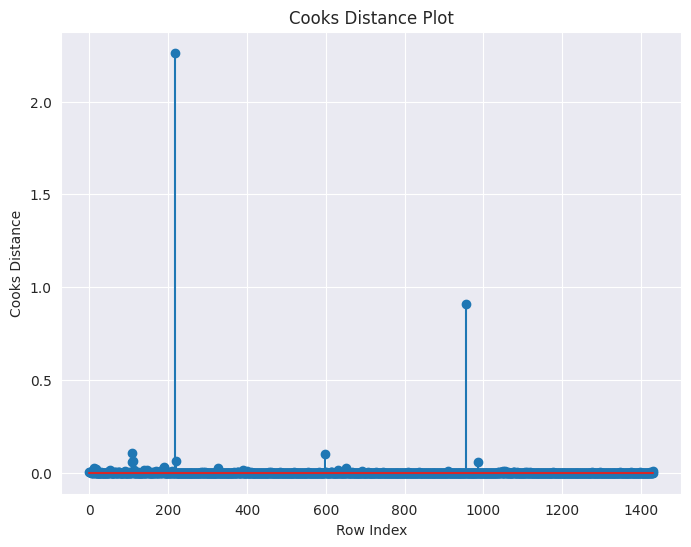

In [137]:
#Plotting cooks distance to identify the influencing data points
plt.figure(figsize = (8,6))
plt.stem(np.arange(len(df2)),np.round(c_m4,3))
plt.title('Cooks Distance Plot')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [138]:
m4_influencial_points = np.where(c_m4>0.5)[0]
m4_influencial_points

array([218, 956])

There are two data points that are influencing the model

<Figure size 1000x800 with 0 Axes>

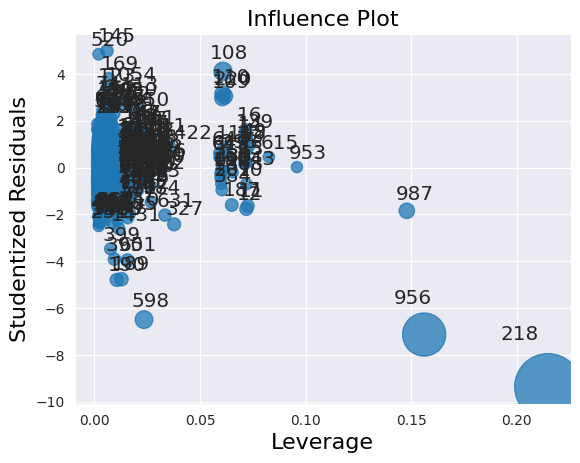

In [139]:
plt.figure(figsize = (10,8))
influence_plot(model_m4)
plt.show()

In [140]:
df2.iloc[m4_influencial_points,:]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
218,12450,44,74172,110,0,1600,5,5,1615,0,1
956,9390,66,50806,86,0,1300,3,5,1480,0,1


In [141]:
#dropping out the influencial data points
df2 = df2.drop(m4_influencial_points, axis = 0)

In [142]:
#Need to reset the index after dropping out the rows
df2 = df2.reset_index()

In [143]:
df2.iloc[m4_influencial_points] #view of the influencing data points

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
218,219,11950,40,73042,110,0,1598,5,5,1075,0,1
956,958,9750,61,50173,110,0,1600,5,5,1075,0,1


In [144]:
df2 = df2.drop(['index'], axis =1) #Dropping the index column
df2

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,0,1300,3,5,1025,0,1
1426,10845,72,19000,86,0,1300,3,5,1015,0,1
1427,8500,71,17016,86,0,1300,3,5,1015,0,1
1428,7250,70,16916,86,0,1300,3,5,1015,0,1


In [145]:
df3 = df2.copy() #Making a copy of df2

Building the m4 model again with the refreshed data

In [146]:
model_m5 = smf.ols(formula = final_m4, data =df3).fit()
model_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:32:03   Log-Likelihood:                -12203.
No. Observations:                1430   AIC:                         2.443e+04
Df Residuals:                    1420   BIC:                         2.448e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.718e+04   1694.279    -10.139      0.000   -2.05e+04   -1.39e+04
Age_08_04         -113.4093      2.520    -44.998      0.000    -118.353    -108.465
KM                  -0.0156      0.001    -12.635      0.000      -0.018      -0.013
HP                  36.6869      5.658      6.484      0.000      25.588      47.785
Automatic           12.4343    149.642      0.083      0.934    -281.108     305.976
cc                  -3.7186      0.511     -7.274      0.000      -4.721      -2.716
Gears              535.0363    180.784      2.960      0.003     180.404     889.669
Weight              31.0613      1.330     23.346      0.000      28.451      33.671
Fuel_Type_Diesel  1779.3696    495.584      3.590      0.000     807.215    2751.524
Fuel_Type_Petrol  1424.6565    313.113      4.550      0.000     810.443    2038.870
==============================================================================
Omnibus:                      147.940   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.226
Skew:                          -0.210   Prob(JB):                    5.65e-211
Kurtosis:                       7.009   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

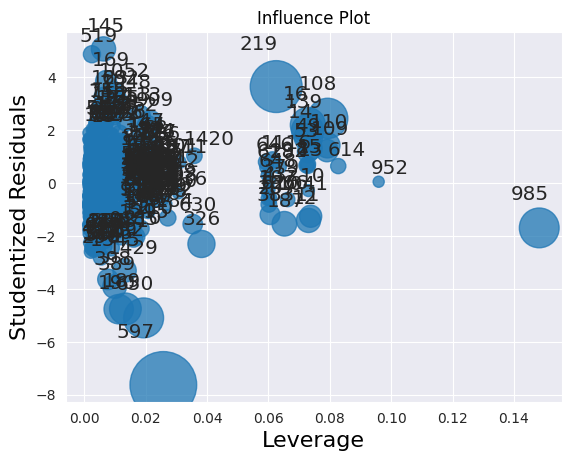

In [147]:
influence_plot(model_m5)
plt.title('Influence Plot')
plt.show()

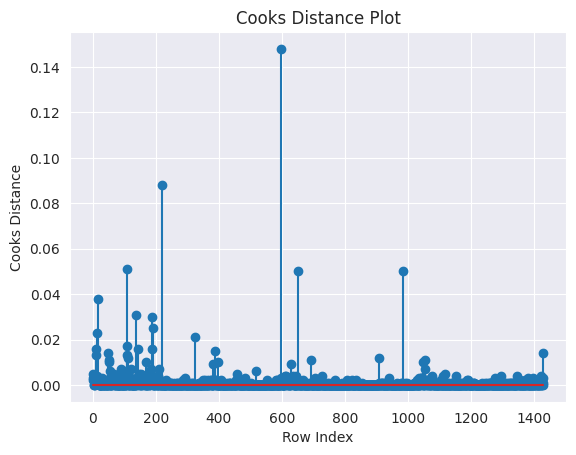

(array([], dtype=int64),)


In [149]:
m5_influence = model_m5.get_influence()
(c_m5,_) = m5_influence.cooks_distance

plt.stem(np.arange(len(df3)), np.round(c_m5,3))
plt.title('Cooks Distance Plot')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [151]:
np.where(c_m5>0.8)[0]

array([], dtype=int64)

None of the indexes were crossing the threshold value 1.0. This tells there were no influencing points that can affect the model predictions.

# Final Model

In [152]:
final_model = smf.ols(formula = final_m4, data = df3).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:38:46   Log-Likelihood:                -12203.
No. Observations:                1430   AIC:                         2.443e+04
Df Residuals:                    1420   BIC:                         2.448e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.718e+04   1694.279    -10.139      0.000   -2.05e+04   -1.39e+04
Age_08_04         -113.4093      2.520    -44.998      0.000    -118.353    -108.465
KM                  -0.0156      0.001    -12.635      0.000      -0.018      -0.013
HP                  36.6869      5.658      6.484      0.000      25.588      47.785
Automatic           12.4343    149.642      0.083      0.934    -281.108     305.976
cc                  -3.7186      0.511     -7.274      0.000      -4.721      -2.716
Gears              535.0363    180.784      2.960      0.003     180.404     889.669
Weight              31.0613      1.330     23.346      0.000      28.451      33.671
Fuel_Type_Diesel  1779.3696    495.584      3.590      0.000     807.215    2751.524
Fuel_Type_Petrol  1424.6565    313.113      4.550      0.000     810.443    2038.870
==============================================================================
Omnibus:                      147.940   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.226
Skew:                          -0.210   Prob(JB):                    5.65e-211
Kurtosis:                       7.009   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test for Normality with Final Model

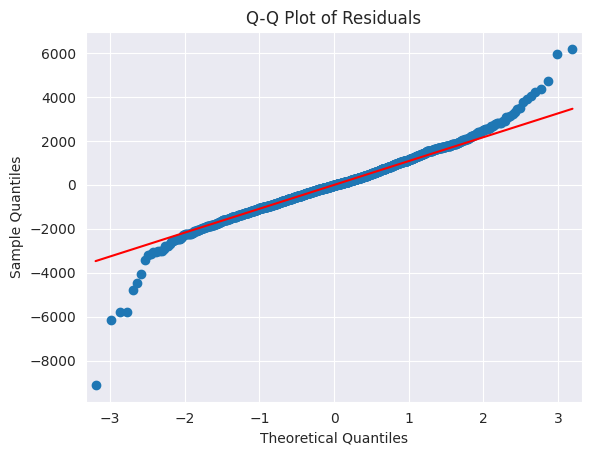

In [153]:
#QQplot to check error were normally distributed or not
qqplot1 = sm.qqplot(final_model.resid, line= 'q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [157]:
np.mean(final_model.resid)

np.float64(1.7322630416341386e-10)

The mean is almost zero here which tells the models is very good.

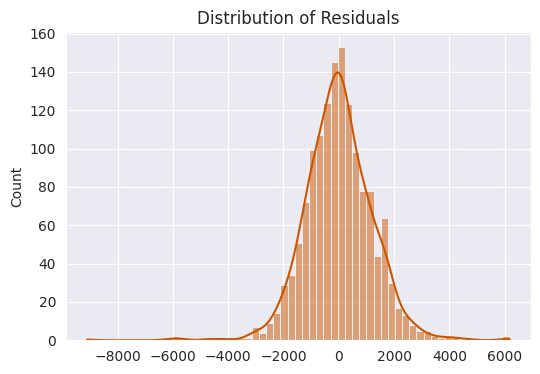

In [161]:
#Histogram for the distribution of errors
sns.set_style('darkgrid')
plt.figure(figsize = (6,4))
sns.histplot(final_model.resid, kde = True, color = "#CC5500")
plt.title('Distribution of Residuals')
plt.show()

From the above plots and distribution, errors were normally distributed

Plot for Homoscadasticity

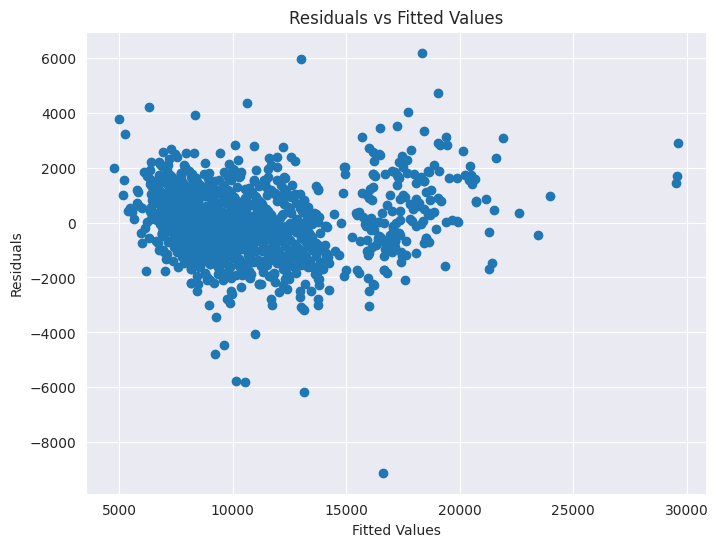

In [162]:
plt.figure(figsize = (8,6))
plt.scatter(final_model.fittedvalues, final_model.resid)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residuals are randomly scattered around the horizontal axis.
Theres no funnel shapes or systematic pattern. Spread of residuals is fairly uniform across all fitted values.

### Train Test Split of data

In [164]:
df4 = df3.copy() #Making a copy of df (Preprocessed data)

In [166]:
df4.drop(['Doors'], axis = 1, inplace = True)
df4.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,5,1165,1,0
1,13750,23,72937,90,0,2000,5,1165,1,0
2,13950,24,41711,90,0,2000,5,1165,1,0
3,14950,26,48000,90,0,2000,5,1165,1,0
4,13750,30,38500,90,0,2000,5,1170,1,0


In [168]:
#Import train test split library
from sklearn.model_selection import train_test_split as tts

In [169]:
y = df4['Price']
X = df4.iloc[:,1:]

In [170]:
#Splitting the data as train and test
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1144, 9), (286, 9), (1144,), (286,))

### Building linear model with train and test data

In [171]:
#importing necessary ibrary
from sklearn.linear_model import LinearRegression

In [172]:
#Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model testing with the training data

In [173]:
#Importing metrics
from sklearn.metrics import r2_score, mean_squared_error

In [174]:
#Predicting the target from the fitted model
yhat_train = model.predict(X_train)

In [175]:
#Metrics to evaluate the model
train_mse = mean_squared_error(y_train, yhat_train)
train_rmse =np.sqrt(train_mse)
train_r2 = r2_score(y_train, yhat_train)

print(f'R-Score : {train_r2:.3f}')
print(f'MSE : {train_mse:.3f}')
print(f'RMSE : {train_rmse:.3f}')

R-Score : 0.882
MSE : 1585644.535
RMSE : 1259.224


From the model it is shown that the model has a very good R score and rmse means that, on average, the model's predicted car price deviates from the actual price by about 1259.

In [178]:
yhat_test = model.predict(X_test)

In [179]:
test_mse = mean_squared_error(y_test, yhat_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, yhat_test)

print(f'R-Score : {test_r2:.3f}')
print(f'MSE : {test_mse:.3f}')
print(f'RMSE : {test_rmse:.3f}')


R-Score : 0.892
MSE : 1236353.880
RMSE : 1111.915


The testing r square and rmse aslo have the same results from the training model with minor deviations.

### Residual Analysis

In [187]:
#Actual values sub predicted values gives the errors (residuals)
train_residuals = y_train - yhat_train

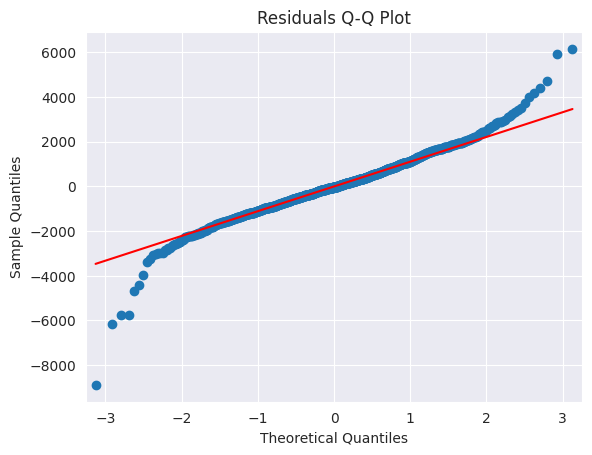

In [188]:
#QQPlot shows training residuals follow a normal distribution
qqplot2 = sm.qqplot(train_residuals, line = 'q')
plt.title('Residuals Q-Q Plot')
plt.show()

plot shows that most residuals closely follow the diagonal line, especially in the central region.
Slight skewness is observed at the tales. Residuals are approximately normal.

In [189]:
train_residuals.mean()

np.float64(4.318509807719009e-12)

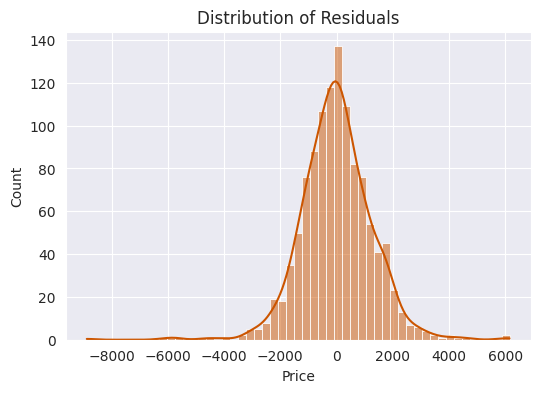

In [190]:
#Histogram plot to check the residuals distribution
sns.set_style('darkgrid')
plt.figure(figsize = (6,4))
sns.histplot(train_residuals, kde = True, color = "#CC5500")
plt.title('Distribution of Residuals')
plt.show()

In [191]:
#Test Residuals
test_residuals = y_test - yhat_test

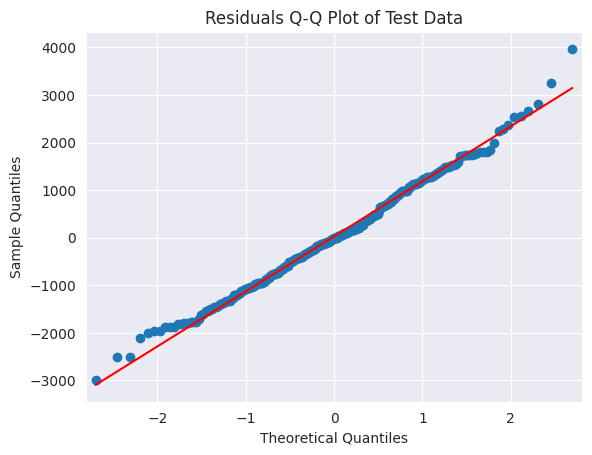

In [245]:
#QQplot for the test residuals
qqplot2 = sm.qqplot(test_residuals, line = 'q')
plt.title('Residuals Q-Q Plot of Test Data')
plt.show()

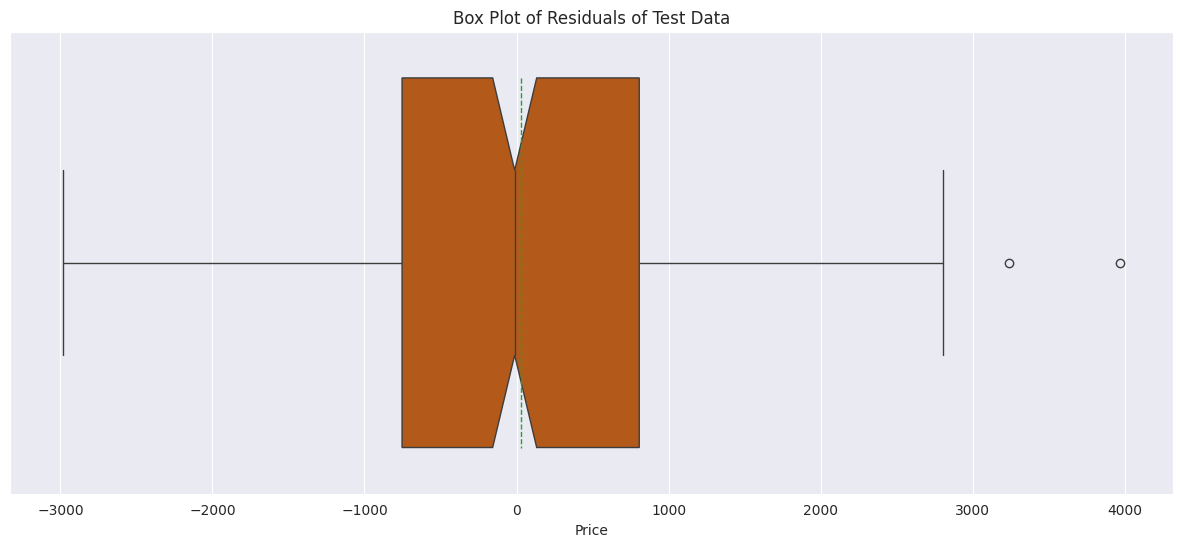

In [197]:
#Box plot to check the centre of the data and the outliers
plt.figure(figsize= (15,6))
sns.boxplot(test_residuals, notch = True, orient ='h', color = '#CC5500', showmeans = True, meanline = True)
plt.title('Box Plot of Residuals of Test Data')
plt.show()

From the above plots for the test data it is observed that the mean in slightly higher than the training data. This tells there were couple of outliers in the errors that are affecting the mean. All the errors are centered and balanced, indicating no bias. Model generalizes well across unseen data.

# Lasso, Ridge and ElasticNet Models

In [200]:
#Creating a data frame to store model coeffecients and visualize later with lasso and ridge coefficients
model_coef = pd.DataFrame(model.coef_, index = X.columns, columns = ['LReg'])
model_coef


,LReg
Age_08_04,-114.577999
KM,-0.013647
HP,35.661293
Automatic,-40.398209
cc,-3.478622
Gears,502.353312
Weight,31.627768
Fuel_Type_Diesel,1556.204177
Fuel_Type_Petrol,1555.951299


### Lasso Regression

In [201]:
#importing Necessary libraries for the Lasso,Ridge,ElasticNet models
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [204]:
#Creating and fitting the Lasso Model
lasso_reg = Lasso(alpha = 1.0)
lasso_reg.fit(X_train, y_train)

Lasso()

### Ridge Regression

In [207]:
#Creating and fitting the Ridge Model
ridge_reg = Ridge(alpha = 1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

### ElasticNet

In [208]:
#Creating and fitting the ElasticNet Model
elastic_reg = ElasticNet(alpha = 1.0)
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [209]:
#Storing the coef values into the data frame of model_coef
model_coef['Lasso_Reg'] = lasso_reg.coef_
model_coef['Elastic_Net'] = elastic_reg.coef_
model_coef['Ridge_Reg'] = ridge_reg.coef_

In [210]:
model_coef

,LReg,Lasso_Reg,Elastic_Net,Ridge_Reg
Age_08_04,-114.577999,-114.554295,-113.693753,-114.497881
KM,-0.013647,-0.013746,-0.014851,-0.013777
HP,35.661293,34.178839,35.108345,33.849860
Automatic,-40.398209,-29.031636,-6.742024,-49.073074
cc,-3.478622,-3.340042,-3.269256,-3.321408
Gears,502.353312,495.754349,41.357133,511.947894
Weight,31.627768,31.718422,31.138614,31.775058
Fuel_Type_Diesel,1556.204177,1280.697892,5.138623,1233.183796
Fuel_Type_Petrol,1555.951299,1393.960235,30.080498,1368.370957


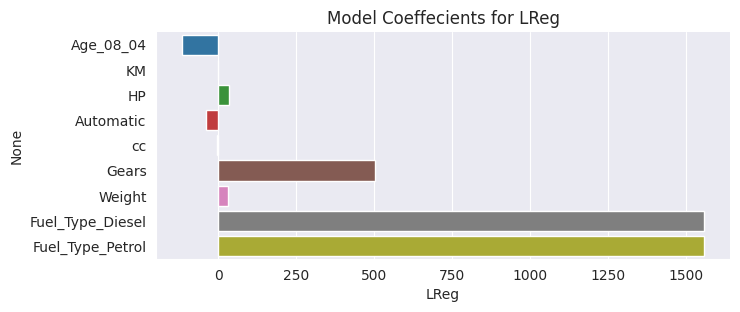

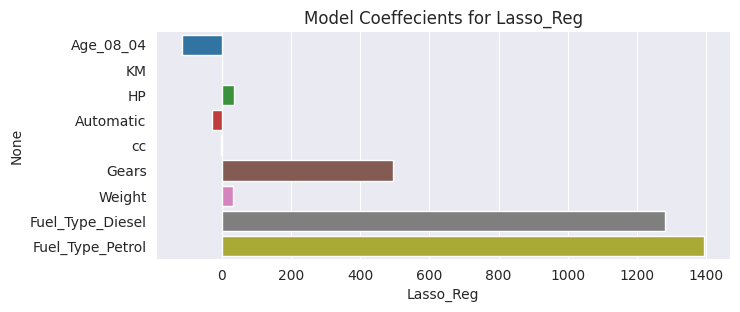

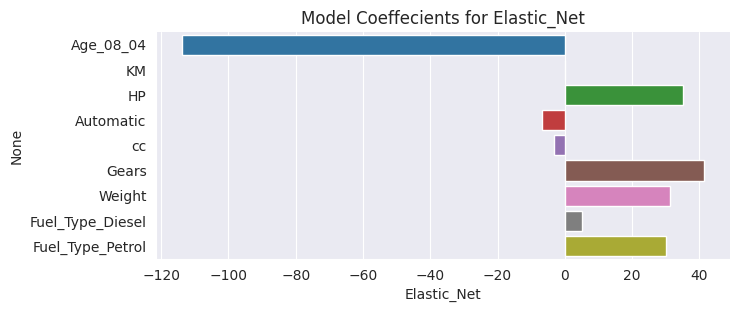

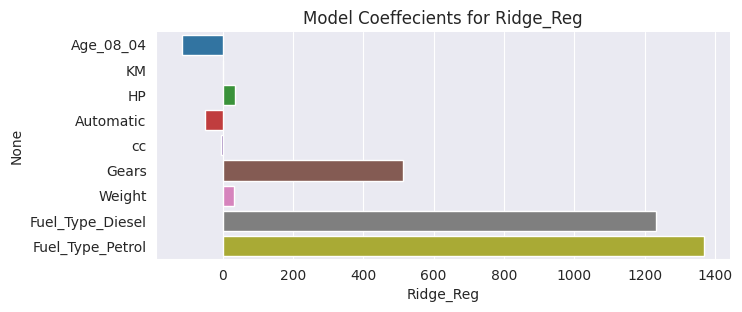

In [222]:
#Visualizing the coefficients using the cat plot and looping it with different models
for col in model_coef.columns:
  sns.set_style('darkgrid')
  sns.catplot(model_coef, x= col, y = model_coef.index,
            kind = 'bar', hue = model_coef.index,
            height = 3, aspect = 2.5)
  plt.title(f'Model Coeffecients for {col}')
  plt.show()




### Metric Analysis of Lasso, Ridge, ElasticNet

Creating a for loop to execute the Lasso, Ridge, ElasticNet models

In [236]:
#Creating a variable to store the names of the models for further use in for loop
model_names = ['Lasso', 'Ridge', 'ElasticNet']
models = [lasso_reg, ridge_reg, elastic_reg]

#Creating an empty list to store the metrics values in it
results1 = []

#Creating a for loop to execute the Lasso, Ridge, ElasticNet models
for name, model in zip(model_names, models):
  lre_predicts= model.predict(X_train)
  lre_mse = mean_squared_error(y_train, lre_predicts)
  lre_rmse = np.sqrt(lre_mse)
  lre_r2 = r2_score(y_train,lre_predicts)

  print(f'{model}: Model')
  print(f'R-Score : {lre_r2:.3f}')
  print(f'MSE : {round(lre_mse,3)}')
  print(f'RMSE : {lre_rmse:.3f}')
  print("-"*20)

#append the metric values one after the other in results list when it iterates
  results1.append({
      'Model' : name,
      'Train_R2' : round(lre_r2,3),
      'Train_RMSE' : lre_rmse
  })
results_df = pd.DataFrame(results1) #Creating a dataframe for the results

Lasso(): Model
R-Score : 0.882
MSE : 1586101.551
RMSE : 1259.405
--------------------
Ridge(): Model
R-Score : 0.882
MSE : 1586212.5
RMSE : 1259.449
--------------------
ElasticNet(): Model
R-Score : 0.879
MSE : 1624080.171
RMSE : 1274.394
--------------------


In [237]:
results_df

,Model,Train_R2,Train_RMSE
0,Lasso,0.882,1259.405237
1,Ridge,0.882,1259.449284
2,ElasticNet,0.879,1274.394041


In [239]:
#model_names = ['Lasso', 'Ridge', 'ElasticNet']
#models = [lasso_reg, ridge_reg, elastic_reg]
results2 = []

for name, model in zip(model_names, models):
  lre_test_predicts= model.predict(X_test)
  lre_test_mse = mean_squared_error(y_test, lre_test_predicts)
  lre_test_rmse = np.sqrt(lre_test_mse)
  lre_test_r2 = r2_score(y_test,lre_test_predicts)

  print(f'{model}: Model')
  print(f'R-Score : {lre_test_r2:.3f}')
  print(f'MSE : {round(lre_test_mse,3)}')
  print(f'RMSE : {lre_test_rmse:.3f}')
  print("-"*20)

  results2.append({
      'Model' : name,
      'Test_R2' : round(lre_test_r2,3),
      'Test_RMSE' : lre_test_rmse
  })
results_df_2 = pd.DataFrame(results2)

Lasso(): Model
R-Score : 0.892
MSE : 1237265.44
RMSE : 1112.324
--------------------
Ridge(): Model
R-Score : 0.892
MSE : 1237723.734
RMSE : 1112.530
--------------------
ElasticNet(): Model
R-Score : 0.891
MSE : 1250132.369
RMSE : 1118.093
--------------------


In [240]:
results_df_2

,Model,Test_R2,Test_RMSE
0,Lasso,0.892,1112.324341
1,Ridge,0.892,1112.530330
2,ElasticNet,0.891,1118.093184


In [243]:
#Creating data frame to store the Linear Regression results
linear = pd.DataFrame({
    'Model' :['Linear'],
    'Train_R2' : train_r2,
    'Train_RMSE' : train_rmse,
    'Test_R2' : test_r2,
    'Test_RMSE' : test_rmse

})

In [244]:
#Creating a data frame to store all the metric results
final_results = pd.merge(results_df, results_df_2, on = 'Model')
final_results = pd.concat([final_results, linear], ignore_index = True)
final_results = final_results[['Model','Train_R2','Test_R2','Train_RMSE','Test_RMSE']]
final_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,Lasso,0.882000,0.892000,1259.405237,1112.324341
1,Ridge,0.882000,0.892000,1259.449284,1112.530330
2,ElasticNet,0.879000,0.891000,1274.394041,1118.093184
3,Linear,0.881585,0.891712,1259.223783,1111.914511


From the above metrics all models have a very good r2 and rmse values. We can consider the Ridge model as it wont zero out the features to regularize the model. It has the same r2 and rmse as lasso model and have higher scores than linear model.  

All models show excellent generalization.

Ridge is a strong candidate: it retains all features and matches Lassos performance without zeroing coefficients.

Linear Regression is also solid, but regularized models offer better robustness.